In [86]:
import numpy 
from matplotlib import pyplot as plt

def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()

[[0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00531767 0.02815437 0.07653151 0.10680833 0.07653151 0.02815437
  0.00531767]
 [0.00381028 0.02017349 0.05483722 0.07653151 0.05483722 0.02017349
  0.00381028]
 [0.00140172 0.00742141 0.02017349 0.02815437 0.02017349 0.00742141
  0.00140172]
 [0.00026475 0.00140172 0.00381028 0.00531767 0.00381028 0.00140172
  0.00026475]]


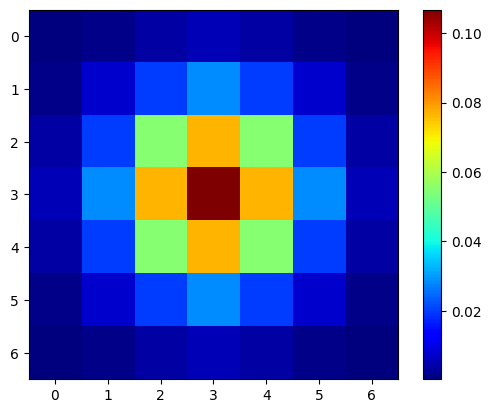

In [87]:
gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [88]:
############################ Denoising filters ###############
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.exposure import equalize_adapthist
from skimage import img_as_ubyte, img_as_float
from matplotlib import pyplot as plt
from skimage import io
import numpy as np



# Img_as_flot to single-precision (32-bit) floating point format, with values in [0, 1]. Later we will convert this value to ubyte format.
img_ne = img_as_float(io.imread("/home/abidhasan/Documents/Indicate_fh/image/noteffected.png", as_gray=False))
img_e = img_as_float(io.imread("/home/abidhasan/Documents/Indicate_fh/image/effected.png", as_gray=False))
#Need to convert to float as we will be doing math on the array
#To read a pack of imahes we have to use io.imread_collection(load_pattern, conserve_memory=True)

# Applying the Contrast limited adaptive histogram equalization to increase the contrast of the image
img_ne_CLAHE = equalize_adapthist(img_ne, kernel_size=None, clip_limit=0.01, nbins=256)
img_e_CLAHE = equalize_adapthist(img_e, kernel_size=None, clip_limit=0.01, nbins=256)

plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/image_ne_CLAHE.jpg", img_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/image_e_CLAHE.jpg", img_e)


In [89]:
from scipy import ndimage as nd
from skimage import filters

# Appling the Gaussian filter with a Gaussian filter Scipy 
gaussian_ne = nd.gaussian_filter(img_ne, sigma=3)
gaussian_e = nd.gaussian_filter(img_e, sigma=3)
gaussian_CLAHE_ne = nd.gaussian_filter(img_ne_CLAHE, sigma=3)
gaussian_CLAHE_e = nd.gaussian_filter(img_e_CLAHE, sigma=3)

plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/gaussian_ne.jpg", gaussian_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/gaussian_e.jpg", gaussian_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/gaussian_CLAHE_ne.jpg", gaussian_CLAHE_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/gaussian_CLAHE_e.jpg", gaussian_CLAHE_e)

# Appling the Mean filter with Scipy 
median_ne = nd.median_filter(img_ne, size=3)
median_e = nd.median_filter(img_e, size=3)
median_CLAHE_ne = nd.median_filter(img_ne_CLAHE, size=3)
median_CLAHE_e = nd.median_filter(img_e_CLAHE, size=3)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_e.jpg", median_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_ne.jpg", median_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_CLAHE_e.jpg", median_CLAHE_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_CLAHE_ne.jpg", median_CLAHE_ne)

# Appling the PREWITT filter with Scipy 
prewitt_ne = filters.prewitt(img_ne)
prewitt_e = filters.prewitt(img_e)
prewitt_CLAHE_ne = filters.prewitt(img_ne_CLAHE)
prewitt_CLAHE_e = filters.prewitt(img_e_CLAHE)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/prewitt_e.jpg", prewitt_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/prewitt_ne.jpg", prewitt_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/prewitt_CLAHE_e.jpg", prewitt_CLAHE_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/prewitt_CLAHE_ne.jpg", prewitt_CLAHE_ne)

# Appling the Sobel filter with Scipy 
sobel_ne = filters.sobel(img_ne)
sobel_e = filters.sobel(img_e)
sobel_CLAHE_ne = filters.sobel(img_ne_CLAHE)
sobel_CLAHE_e = filters.sobel(img_e_CLAHE)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/sobel_e.jpg", sobel_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/sobel_ne.jpg", sobel_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/sobel_CLAHE_e.jpg", sobel_CLAHE_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/sobel_CLAHE_ne.jpg", sobel_CLAHE_ne)


print('maxumue value in floating image data', np.max(median_e))
print('minimume value in floating image data', np.min(median_e))


maxumue value in floating image data 1.0
minimume value in floating image data 0.0


In [90]:
##### NLM #####

sigma_est = np.mean(estimate_sigma(img_ne_CLAHE))
sigma_est = np.mean(estimate_sigma(img_e_CLAHE))
patch_kw = dict(patch_size=5,      
                patch_distance=3,  
                multichannel=True)
nlm_ne = denoise_nl_means(img_ne, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3)
nlm_e = denoise_nl_means(img_e, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3)


nlm_CLAHE_ne = denoise_nl_means(img_ne_CLAHE, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3)
nlm_CLAHE_e = denoise_nl_means(img_e_CLAHE, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3)

plt.imsave("/home/abidhasan/Documents/Indicate_fh/image/NLM_ne.jpg",nlm_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/NLM_e.jpg",nlm_e)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/NLM_CLAHE_ne.jpg",nlm_CLAHE_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/NLM_CLAHE_e.jpg",nlm_CLAHE_e)

/tmp/ipykernel_160152/1508733247.py:3: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigma_est = np.mean(estimate_sigma(img_ne_CLAHE))
/tmp/ipykernel_160152/1508733247.py:4: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigma_est = np.mean(estimate_sigma(img_e_CLAHE))


In [91]:
print("Shape of original Not Effected image:", img_ne.shape)
print("Shape of original Effected image:", img_e.shape)
print("Shape of Filtered Not Effected image:", nlm_ne.shape)
print("Shape of Filtered Effected image:", nlm_e.shape)

Shape of original Not Effected image: (572, 576, 3)
Shape of original Effected image: (510, 512, 3)
Shape of Filtered Not Effected image: (572, 576, 3)
Shape of Filtered Effected image: (510, 512, 3)


Text(0.5, 1.0, 'Original Effected image')

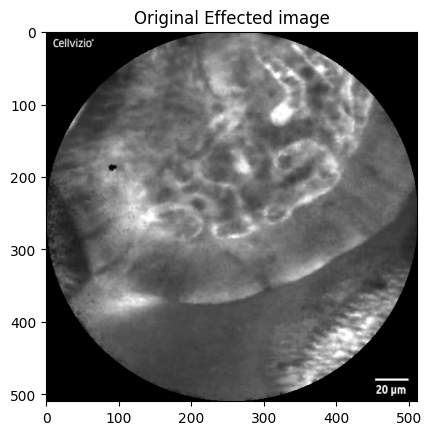

In [92]:
plt.imshow(img_e)
plt.title('Original Effected image')

Text(0.5, 1.0, 'Original Effected image after CLAHE')

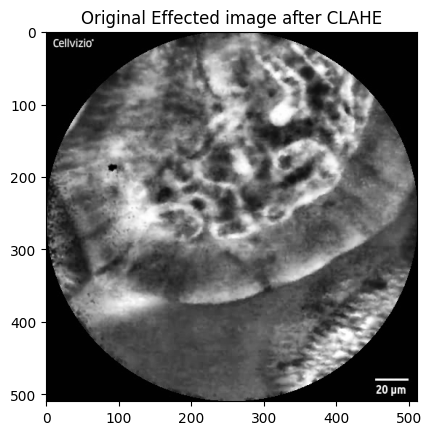

In [93]:
plt.imshow(img_e_CLAHE)
plt.title('Original Effected image after CLAHE')

Text(0.5, 1.0, 'Effected Image after Median filtarization')

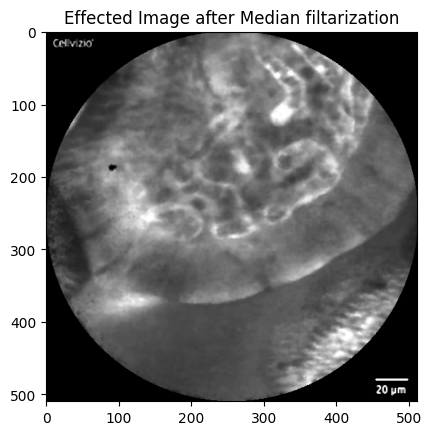

In [94]:
plt.imshow(median_e)
plt.title('Effected Image after Median filtarization')

Text(0.5, 1.0, 'Effected Image after NLM filtarization')

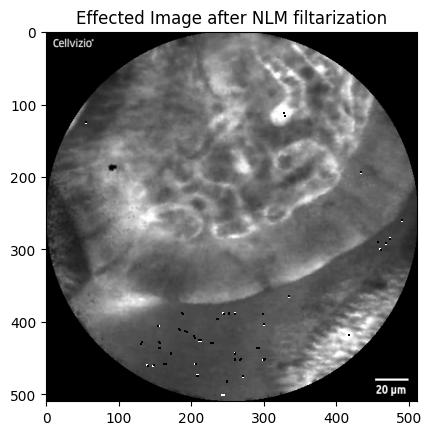

In [95]:
plt.imshow(nlm_e)
plt.title('Effected Image after NLM filtarization')

After reshape, Shape of CLAHE AND NLM Effected image: (256, 256, 3)
Maximume value inside image array: 255
Minimume value inside image array: 0


/home/abidhasan/.local/lib/python3.8/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/home/abidhasan/.local/lib/python3.8/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


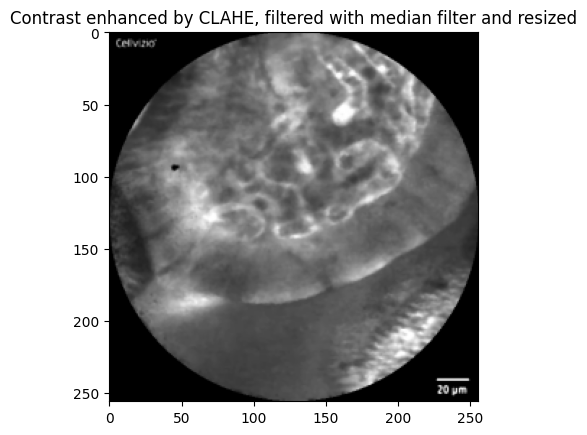

In [96]:
from skimage.transform import rescale, resize, downscale_local_mean
#Resize, resize image to given dimensions (shape)

gaussian_resized_e = img_as_ubyte(resize(gaussian_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
gaussian_resized_ne = img_as_ubyte(resize(gaussian_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer
gaussian_CLAHE_resized_e = img_as_ubyte(resize(gaussian_CLAHE_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
gaussian_CLAHE_resized_ne = img_as_ubyte(resize(gaussian_CLAHE_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer

prewitt_resized_e = img_as_ubyte(resize(prewitt_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
prewitt_resized_ne = img_as_ubyte(resize(prewitt_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer
prewitt_CLAHE_resized_e = img_as_ubyte(resize(prewitt_CLAHE_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
prewitt_CLAHE_resized_ne = img_as_ubyte(resize(prewitt_CLAHE_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer

sobel_resized_e = img_as_ubyte(resize(sobel_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
sobel_resized_ne = img_as_ubyte(resize(sobel_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer
sobel_CLAHE_resized_e = img_as_ubyte(resize(sobel_CLAHE_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
sobel_CLAHE_resized_ne = img_as_ubyte(resize(sobel_CLAHE_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer

     
median_resized_e = img_as_ubyte(resize(median_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
median_resized_ne = img_as_ubyte(resize(median_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer
median_CLAHE_resized_e = img_as_ubyte(resize(median_CLAHE_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
median_CLAHE_resized_ne = img_as_ubyte(resize(median_CLAHE_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer

nlm_resized_e = img_as_ubyte(resize(nlm_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
nlm_resized_ne = img_as_ubyte(resize(nlm_ne, (256, 256), anti_aliasing=True))             #Check dimensions in variable explorer
nlm_CLAHE_resized_e = img_as_ubyte(resize(nlm_CLAHE_e, (256, 256), anti_aliasing=True))               #Check dimensions in variable explorer 
nlm_CLAHE_resized_ne = img_as_ubyte(resize(nlm_CLAHE_ne, (256, 256), anti_aliasing=True)) 
                     
print("After reshape, Shape of CLAHE AND NLM Effected image:", median_resized_ne.shape)
print('Maximume value inside image array:', np.max(median_resized_e))
print('Minimume value inside image array:', np.min(median_resized_e))
plt.imshow(median_resized_e)
plt.title('Contrast enhanced by CLAHE, filtered with median filter and resized')
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_reshaped_ne.jpg", median_resized_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/median_reshaped_e.jpg", median_resized_e)

After reshape, Shape of CLAHE AND NLM Effected image: (256, 256, 3)
Maximume value inside image array: 255
Minimume value inside image array: 0


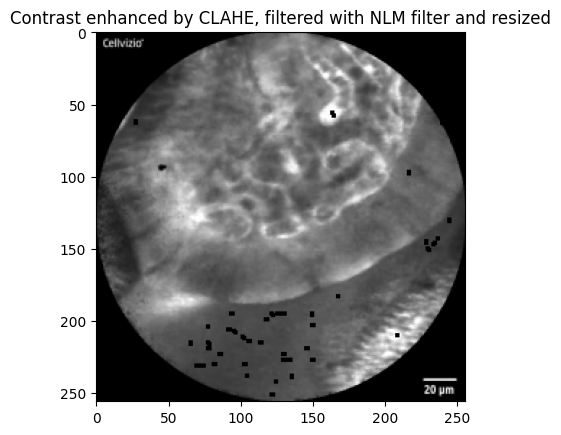

In [97]:
print("After reshape, Shape of CLAHE AND NLM Effected image:", nlm_resized_ne.shape)
print('Maximume value inside image array:', np.max(nlm_resized_e))
print('Minimume value inside image array:', np.min(nlm_resized_e))
plt.imshow(nlm_resized_e)
plt.title('Contrast enhanced by CLAHE, filtered with NLM filter and resized')
plt.imsave("/home/abidhasan/Documents/Indicate_fh/NLM_reshaped_ne.jpg", nlm_resized_ne)
plt.imsave("/home/abidhasan/Documents/Indicate_fh/NLM_reshaped_e.jpg", nlm_resized_e)

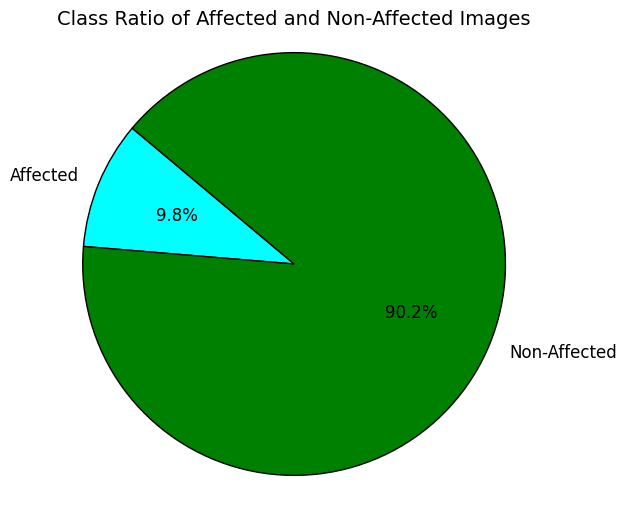

In [13]:
import matplotlib.pyplot as plt

# Number of images in each class
affected_count = 890
non_affected_count = 8205

# Labels for the pie chart
labels = ['Affected', 'Non-Affected']

# Sizes of each pie slice
sizes = [affected_count, non_affected_count]

# Colors for each pie slice
# Deep orange for affected, blue for non-affected
colors = ['#00FFFF', '#008000']

# Explode the 'affected' slice slightly
explode = (0, 0)

# Create the pie chart
plt.figure(figsize=(6, 6))  # Smaller figure size
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=140, wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})


# Title with a readable font size
plt.title('Class Ratio of Affected and Non-Affected Images', fontsize=14)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
 
# Save the third plot
plt.savefig('/home/abidhasan/Documents/Indicate_FH/performance_figures/dataset_ratio.eps',
            format='eps', bbox_inches='tight')

In [6]:
import tensorflow as tf
tf.version.VERSION

'2.12.0'